# NIGERIAN GRADUATES FIRST JOB PREDICTION BEING GOTTEN VIA NYSC

This project is my final project for the She Code Africa Mentorship Program for Data Science Cohort 3. The Dataset was gotten from Kaggle but extracted by Stutern(A skill development and job placement platform)

In [17]:
#importing all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle
%matplotlib inline

In [18]:
#reading the datasets
df=pd.read_csv('USE Nigerian Graduates Destination Survey 2018 (2013 -2017).csv')

In [48]:
#viewing the first five rows of the dataset
df.head()

,gender,grad_year,course,Poly_Uni_attended,Uni_Poly_Type,qualification,NYSC_complete,course_helped_emp,course_helped_skills,best_sector,job_search_mode,job1_reason,job1_x_qual,job1_level,job1_via_NYSC,car_rent_from_job1
0,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Federal,Bachelor's degree,Yes,Strongly Disagree,"Critical thinking skills, Ability to solve com...",Media,Internship,To see if I would like the type of work it inv...,Yes: the qualification was a formal requirement,Entry level,No,No
1,Female,2013,Economics,"Bells University of Technology, Otta",Private,Bachelor's degree,Yes,Disagree,"Ability to work with others, Written communica...",Consulting,Employer's website,It fitted into my career plan/it was exactly t...,Yes: the qualification was a formal requirement,Entry level,No,No
2,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Private,Master's degree,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,Female,2013,Statistics,Ekiti State University,State,Bachelor's degree,Yes,Agree,Critical thinking skills,Advertising / Marketing / Comms,"Personal contacts, including family and friends",To gain and broaden my experience in order to ...,Yes: while the qualification was not a formal ...,Managerial,No,No
4,Male,2015,Electrical & Electronic Engineering,University of Benin,Federal,Bachelor's degree,No,Agree,"Ability to work with others, Knowledge of the ...",NGO,Social media/professional networking sites,It was in the right location,No: the qualification was not required,Entry level,No,No


In [49]:
#extracting details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                5218 non-null   object
 1   grad_year             5218 non-null   int64 
 2   course                5218 non-null   object
 3   Poly_Uni_attended     5218 non-null   object
 4   Uni_Poly_Type         5218 non-null   object
 5   qualification         5218 non-null   object
 6   NYSC_complete         5218 non-null   object
 7   course_helped_emp     3431 non-null   object
 8   course_helped_skills  3431 non-null   object
 9   best_sector           3296 non-null   object
 10  job_search_mode       3431 non-null   object
 11  job1_reason           1655 non-null   object
 12  job1_x_qual           1655 non-null   object
 13  job1_level            1655 non-null   object
 14  job1_via_NYSC         5218 non-null   object
 15  car_rent_from_job1    3431 non-null   

All columns present are of the 'object type' and just the graduation year is an 'integer type'
The number of cells that are not empty are also shown. The gender row has 5218 all filled up with actual values
And the best sector has 3296 rows filled up with actual values while the rest rows(1922) in that column are empty

In [50]:
#getting the number of rows and columns
df.shape

(5218, 16)

The dataset has 5218 rows and 16 columns

In [51]:
#viewing the number of empty rows this time around
df.isnull().sum()

gender                     0
grad_year                  0
course                     0
Poly_Uni_attended          0
Uni_Poly_Type              0
qualification              0
NYSC_complete              0
course_helped_emp       1787
course_helped_skills    1787
best_sector             1922
job_search_mode         1787
job1_reason             3563
job1_x_qual             3563
job1_level              3563
job1_via_NYSC              0
car_rent_from_job1      1787
dtype: int64

It is majorly 8 columns that don't have null values. They are gender, grad_year, course, Poly_Uni_attended, qualfication,
NYSC_complete and job1_via NYSC

# EXPLORATORY DATA ANALYSIS

In [52]:
#showing all possible values in the grad_year column
df['grad_year'].unique()

array([2014, 2013, 2017, 2015, 2016], dtype=int64)

In [53]:
df['grad_year'].value_counts()

2015    1327
2017    1259
2016    1214
2014     824
2013     594
Name: grad_year, dtype: int64

<AxesSubplot:xlabel='grad_year', ylabel='count'>

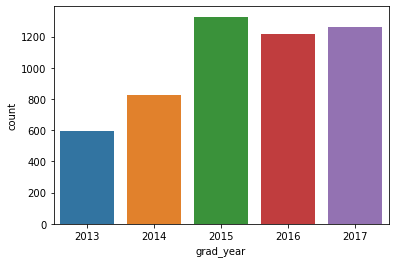

In [54]:
sns.countplot(data=df, x=df['grad_year'])

Most graduates for this survey graduated in 2015, 2016 and 2017. And the range of graduates' graduating year for this survey is between 2013 to 2017. The highest number of graduates for this survey are from the year 2015; A total of 1327.

In [55]:
#showing all possible values in the gender column
df['gender'].unique()

array(['Male', 'Female', 'Prefer not to say'], dtype=object)

In [56]:
#Number of males females and those who don't specify
df['gender'].value_counts()

Male                 2623
Female               2592
Prefer not to say       3
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

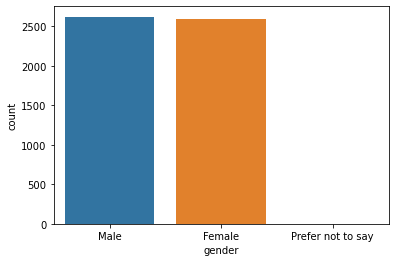

In [57]:
sns.countplot(data= df, x=df['gender'])

From above, we see that the values in the gender column are Male, Female and Prefer not to say. The dataset is balanced between male and female but unbalanced when we consider the 'prefer not to say' option.
The prefer not to say option is quite low (3). This might be as a result of the few people that identify as non binary in Nigeria or people who choose to keep their identity private for this survey. And although slight, female graduates are seen to be lesser than male graduates.

In [58]:
#Displaying the number of different Universities and Polytechniques represented
df['Poly_Uni_attended'].nunique()

158

There are different polytechnics and university represented in this survey. There are a total of 158 unique schools 
represented here.

In [59]:
#Displaying these unique Universities and Polytechniques and the nymber of times they are represented in rows
df['Poly_Uni_attended'].value_counts()

University of Lagos                                                                            527
Covenant University Ota                                                                        432
Obafemi Awolowo University,Ile-Ife                                                             325
Babcock University,Ilishan-Remo                                                                213
University of Nigeria, Nsukka                                                                  208
                                                                                              ... 
Abraham Adesanya Polytechnic, Dogbolu/Akanran Ibadan Road, Atikori, Ijebu Igbo, Ogun State.      1
Nasarawa State Polytechnic, Lafia, Nasarawa State.                                               1
Taraba State University, Jalingo                                                                 1
Ibadan City Polytechnic, Alakia-Isebo/Iyana Church Road, Ibadan, Oyo State.                      1
Renaissanc

University of Lagos has the highest number of students in this survey, followed by Covenant University.
Dorben Polytechnique has the lowest number of students represented in this survey as well as Federal Polytechnique, Mubi 
and others.
The datasets aren't quite balanced here. Comparing the number of rows covered by Lagos State Graduate and by Dorben Poylytechnique, this shows that the dataset isn't quite representing of all schools in Nigeria.

In [60]:
#Showing the number of rows occupied by Universities and Polytechnique Types
df['Uni_Poly_Type'].value_counts()

Federal       2808
Private       1133
State         1126
Foreign        136
Indigenous      15
Name: Uni_Poly_Type, dtype: int64

Federal Universities and Polytechniques have the highest number of representation followed by Private Universities,
then State, Foreign schools and other Nigerian Schools not mentioned by names. The number from Federal Universities is quite understandable as most Nigerian Universitites and colleges are owned by the Federal Government.

In [61]:
#Displaying the number of people represented that had various qualifications
df['qualification'].value_counts()

Bachelor's degree                  4401
Higher National Diploma (HND)       368
Master's degree                     306
Ordinary National Diploma (OND)     116
MBA degree                           20
PhDs/Doctorate Degree                 7
Name: qualification, dtype: int64

<AxesSubplot:xlabel='count', ylabel='qualification'>

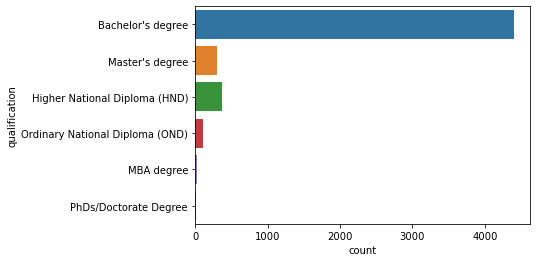

In [62]:
sns.countplot(data= df,y=df['qualification'])

Bachelors Degee Holders are highly represented in this survey, followed by HND, Masters, OND, MBA and PhD's. From this survey, it is observed that most Nigerians prefer to go through Universities than Polytechnics.

In [63]:
#The unique values in the job search mode column and the number of times they appear in the entire dataset.
df['job_search_mode'].value_counts()

Personal contacts, including family and friends                     1448
Social media/professional networking sites                           639
Recruitment agency/Online job site                                   612
Media (e.g. newspaper/magazine advertisement)                        267
Internship                                                           219
University/polytechnic (e.g. Careers Service, lecturer, website)     151
Employer's website                                                    95
Name: job_search_mode, dtype: int64

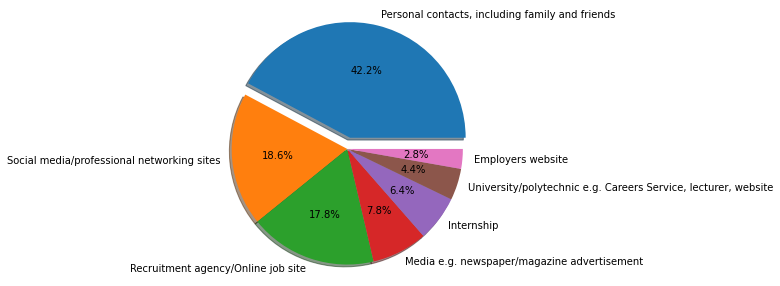

In [64]:
plt.figure(figsize=(5,5))
explode=(0.1,0,0,0,0,0,0)
sm=df['job_search_mode'].value_counts()
uv=df['job_search_mode'].unique()
labels=['Personal contacts, including family and friends','Social media/professional networking sites', 'Recruitment agency/Online job site', 'Media e.g. newspaper/magazine advertisement','Internship', 'University/polytechnic e.g. Careers Service, lecturer, website' , 'Employers website']
plt.pie(data=df,explode=explode, x=sm, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

Most graduates search for jobs or hear about jobs via personal contacts from family and friends. Social media is the second major place people search for jobs or get job vacancy information from. Recruitment agencies and online job sites is the third main place people get job vacancy information from. People barely get news about job vacancies directly from The employers websites.

In [65]:
#The number of people who eventually got their jobs via NYSC year
df['job1_via_NYSC'].value_counts()

No                              3561
I have not completed my NYSC     860
Yes                              797
Name: job1_via_NYSC, dtype: int64

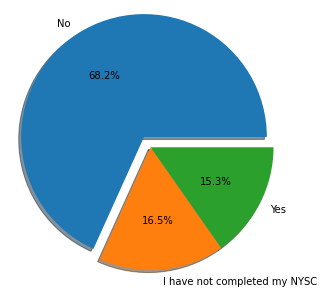

In [66]:
plt.figure(figsize=(5,5))
explode=(0.1,0,0)
sm=df['job1_via_NYSC'].value_counts()
uv=df['job1_via_NYSC'].unique()
labels=['No','I have not completed my NYSC', 'Yes']
plt.pie(data=df,explode=explode, x=sm, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

From the available rows in the job1_via NYSC column, we can see that people barely get their first jobs through NYSC (either via retainment, recommendation, posting to a different branch of the same organisation or any way related). And just a few get their first jobs via NYSC.

In [67]:
#Unique values in the Courses Column
df.course.value_counts()

Computer Science                                        459
Accountancy                                             373
Economics                                               321
Electrical & Electronic Engineering                     213
Mass Communication (Communication and Language Arts)    204
                                                       ... 
Medical Biochemistry                                      1
Music                                                     1
Department of Pharmacology and Toxicology                 1
Medical Radiography and Radiological Sciences             1
Child Dental Health                                       1
Name: course, Length: 127, dtype: int64

From this survey, alot of Nigarians study Computer Science in school. This is an interesting insight as what makes most developed countries is the level (growth) of Science and Technology in those countries.

In [68]:
#The different University Types
df['Uni_Poly_Type'].value_counts()

Federal       2808
Private       1133
State         1126
Foreign        136
Indigenous      15
Name: Uni_Poly_Type, dtype: int64

<AxesSubplot:xlabel='Uni_Poly_Type'>

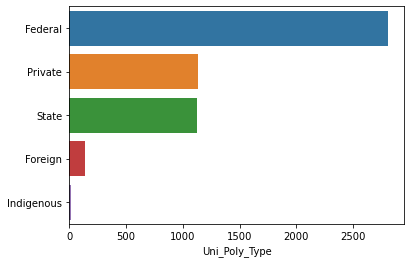

In [69]:
sns.barplot(data= df, y=df['Uni_Poly_Type'].unique(),x=df['Uni_Poly_Type'].value_counts())

From this, we can see that several Nigerians attend more of the Federal Schools than any other kind. 

# Preparation of the dataset for the Predictive Model

In [19]:
#dropping the 'Prefered Not to say' rows in the gender column so as to basically balance the dataset in terms of gender
#...since they aren't much
g_drop = df[df['gender']=='Prefer not to say'].index
df.drop(g_drop, axis = 0, inplace = True)

In [20]:
#dropping the 'ongoing corpers' and corpers who haven't served
#selecting only coppers who have served
NYSC_drop = df[df['NYSC_complete']!='Yes'].index
df.drop(NYSC_drop, axis = 0, inplace = True)

In [21]:
job1_drop = df[df['job1_via_NYSC']=='I have not completed my NYSC'].index
df.drop(job1_drop, axis = 0, inplace = True)

In [22]:
#checking the number of rows after the drop
df.shape

(3408, 16)

In [74]:
#viewing the first 5 rows for more information
df.head()

,gender,grad_year,course,Poly_Uni_attended,Uni_Poly_Type,qualification,NYSC_complete,course_helped_emp,course_helped_skills,best_sector,job_search_mode,job1_reason,job1_x_qual,job1_level,job1_via_NYSC,car_rent_from_job1
0,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Federal,Bachelor's degree,Yes,Strongly Disagree,"Critical thinking skills, Ability to solve com...",Media,Internship,To see if I would like the type of work it inv...,Yes: the qualification was a formal requirement,Entry level,No,No
1,Female,2013,Economics,"Bells University of Technology, Otta",Private,Bachelor's degree,Yes,Disagree,"Ability to work with others, Written communica...",Consulting,Employer's website,It fitted into my career plan/it was exactly t...,Yes: the qualification was a formal requirement,Entry level,No,No
2,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Private,Master's degree,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,Female,2013,Statistics,Ekiti State University,State,Bachelor's degree,Yes,Agree,Critical thinking skills,Advertising / Marketing / Comms,"Personal contacts, including family and friends",To gain and broaden my experience in order to ...,Yes: while the qualification was not a formal ...,Managerial,No,No
5,Male,2013,Economics,"Bowen University, Iwo",Private,Higher National Diploma (HND),Yes,Strongly Disagree,"Critical thinking skills, Ability to work with...",Creatives/Art/Design,"University/polytechnic (e.g. Careers Service, ...",It fitted into my career plan/it was exactly t...,Yes: the qualification was a formal requirement,Entry level,No,No


From the above, University and polytechnic types are distributed as shown above.Federal schools being the higest represented
and other nameless indigenous schools being the lowest.

In [23]:
#dropping column because they are irrelevant
#dropping the nysc complete feature because i have made sure all values in that column is yes.
df.drop(['car_rent_from_job1', 'course_helped_emp', 'course_helped_skills', 'best_sector', 'job1_reason', 'job1_x_qual', 'job1_x_qual', 'job1_level', 'grad_year', 'Poly_Uni_attended','NYSC_complete'], axis=1, inplace=True)


In [24]:
#Filling the job_search mode with the mode(most occuring value) of that column which is via personal contact from family 
#and friends.
for col in ['job_search_mode']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
#checking 
df.isnull().sum()

gender             0
course             0
Uni_Poly_Type      0
qualification      0
job_search_mode    0
job1_via_NYSC      0
dtype: int64

For the model, I'm choosing to drop these columns because they aren't quite balanced with the others. For example, the 
rest have 5218 rows while these ones above have 3431, 3296, and 1655. I'm also dropping most of them because they aren't relevant to the model being developed

In [26]:
df.head()

,gender,course,Uni_Poly_Type,qualification,job_search_mode,job1_via_NYSC
0,Male,Psychology,Federal,Bachelor's degree,Internship,No
1,Female,Economics,Private,Bachelor's degree,Employer's website,No
2,Male,Mass Communication (Communication and Language...,Private,Master's degree,"Personal contacts, including family and friends",No
3,Female,Statistics,State,Bachelor's degree,"Personal contacts, including family and friends",No
5,Male,Economics,Private,Higher National Diploma (HND),"University/polytechnic (e.g. Careers Service, ...",No


In [ ]:
df.tail()

In [29]:
#converting all text data to numerical data
def handle_non_numerical_data (df):
    columns=df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype !=np.int64 and df[column].dtype!=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
                    
            df[column]=list(map(convert_to_int, df[column]))
    return df


df=handle_non_numerical_data(df)

In [30]:
df.head()

,gender,course,Uni_Poly_Type,qualification,job_search_mode,job1_via_NYSC
0,1,75,1,4,6,0
1,0,29,4,4,2,0
2,1,90,4,0,1,0
3,0,10,0,4,1,0
5,1,29,4,1,0,0


In [31]:
df.tail()

,gender,course,Uni_Poly_Type,qualification,job_search_mode,job1_via_NYSC
5211,0,47,0,1,1,0
5213,0,76,1,4,1,0
5215,0,52,3,4,6,1
5216,0,117,0,1,1,1
5217,1,29,1,4,1,0


In [80]:
df['job1_via_NYSC'].unique()

array([0, 1], dtype=int64)

In [81]:
df.describe()


,gender,course,Uni_Poly_Type,qualification,job_search_mode,job1_via_NYSC
count,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000
mean,0.473298,63.247066,1.814847,3.492958,3.275822,0.199824
std,0.499360,35.869337,1.117958,1.205095,1.404083,0.399927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,2.000000,4.000000,3.000000,0.000000
50%,0.000000,55.500000,2.000000,4.000000,4.000000,0.000000
75%,1.000000,95.000000,3.000000,4.000000,4.000000,0.000000
max,1.000000,121.000000,4.000000,4.000000,6.000000,1.000000


The above shows that there are 121 different courses in the dataset.

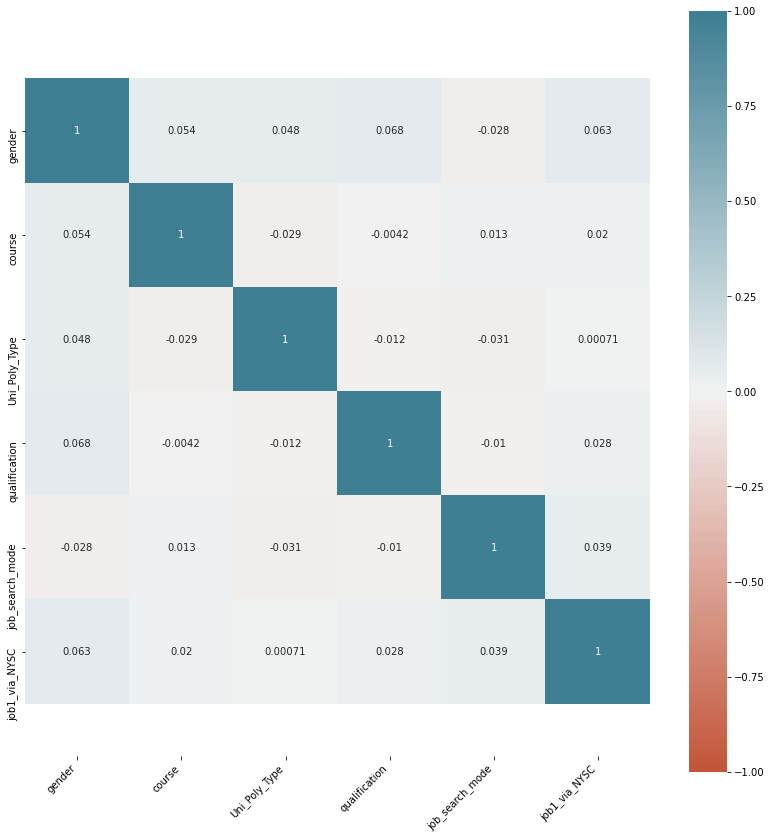

In [82]:
# Correlation of the features
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

From the above we can see that there isnt't quite a correlation between features. Thus all the features can be used

# SPLITTING THE DATASET 

In [11]:
x=np.array(df.drop(['job1_via_NYSC'], 1))
x=preprocessing.scale(x)
y=np.array(df['job1_via_NYSC'])
#splitting the dataset to 70 percent train data and 30 percent test data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

# Support Vector Machine

In [84]:
clf_SVM=SVC(gamma='auto', kernel='linear', C=10 )
clf_SVM=clf_SVM.fit(x_train, y_train)
SVM_accuracy_test=clf_SVM.score(x_test, y_test)
SVM_accuracy_train=clf_SVM.score(x_train, y_train)
print(SVM_accuracy_test)
print(SVM_accuracy_train)

0.782991202346041
0.8075471698113208


In [85]:
y_pred_svm = clf_SVM.predict(x_test)
confusion_matrix(y_test, y_pred_svm)

array([[801,   0],
       [222,   0]], dtype=int64)

In [86]:
#From this we can see that 823 were rightly predicted as No (No job via NYSC) and 200 were 
#wrongly classified as No, when they were supposed to have been predicted as yes (Yes, Job 1 via NYSC)

Text(33.0, 0.5, 'Actual values')

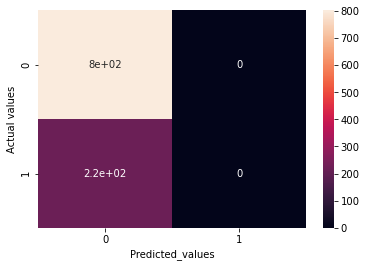

In [87]:
cm = confusion_matrix(y_test, clf_SVM.predict(x_test))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted_values')
plt.ylabel('Actual values')

In [88]:
classification_report(y_test, y_pred_svm)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.78      1.00      0.88       801\n           1       0.00      0.00      0.00       222\n\n    accuracy                           0.78      1023\n   macro avg       0.39      0.50      0.44      1023\nweighted avg       0.61      0.78      0.69      1023\n'

# Logistic Regression

In [89]:
clf_L= LogisticRegression(max_iter=1000,random_state=42)
clf_L=clf_L.fit(x_train, y_train)
L_accuracy_test=clf_L.score(x_test, y_test)
L_accuracy_train=clf_L.score(x_train, y_train)
print(L_accuracy_test)
print(L_accuracy_train)

0.782991202346041
0.8075471698113208


In [90]:
y_pred_L = clf_L.predict(x_test)
confusion_matrix(y_test, y_pred_L)

array([[801,   0],
       [222,   0]], dtype=int64)

In [91]:
#From this we can see that 823 were rightly predicted as No (No job via NYSC) and 200 were 
#wrongly classified as No, when they were supposed to have been predicted as yes (Yes, Job 1 via NYSC)

Text(33.0, 0.5, 'Actual values')

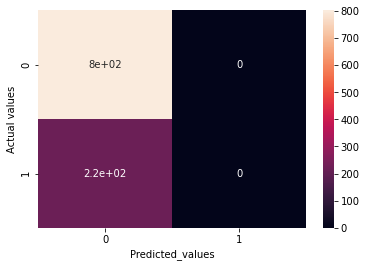

In [92]:
cm = confusion_matrix(y_test, clf_L.predict(x_test))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted_values')
plt.ylabel('Actual values')

In [93]:
classification_report(y_test, y_pred_L)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.78      1.00      0.88       801\n           1       0.00      0.00      0.00       222\n\n    accuracy                           0.78      1023\n   macro avg       0.39      0.50      0.44      1023\nweighted avg       0.61      0.78      0.69      1023\n'

# Decision Tree

In [12]:
clf_D= DecisionTreeClassifier(max_depth=8, random_state=42)
clf_D=clf_D.fit(x_train, y_train)
D_accuracy_test=clf_D.score(x_test, y_test)
D_accuracy_train=clf_D.score(x_train, y_train)
print(D_accuracy_test)
print(D_accuracy_train)

0.7966764418377321
0.8247379454926624


In [95]:
y_pred_D = clf_D.predict(x_test)
confusion_matrix(y_test, y_pred_D)

array([[777,  24],
       [205,  17]], dtype=int64)

In [96]:
#From this we can see that 775 were rightly predicted as No (No job via NYSC) and 200 were 
#wrongly predicted as No, when they were supposed to have been predicted as yes (Yes, Job 1 via NYSC)
#37 were predicted to be yes when they were actually no and 20 were predicted correctly to be yes



                         #predicted
                         #no     yes
       #actuals          yes      no

Text(33.0, 0.5, 'Actual values')

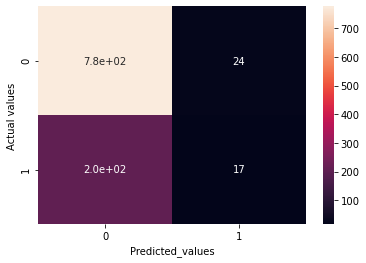

In [97]:
cm = confusion_matrix(y_test, clf_D.predict(x_test))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted_values')
plt.ylabel('Actual values')

In [98]:
classification_report(y_test, y_pred_D)

'              precision    recall  f1-score   support\n\n           0       0.79      0.97      0.87       801\n           1       0.41      0.08      0.13       222\n\n    accuracy                           0.78      1023\n   macro avg       0.60      0.52      0.50      1023\nweighted avg       0.71      0.78      0.71      1023\n'

In [99]:
#piclkling(saving) the created model(Decision Tree) for deployment
clf_D='clf_D.pkl'
pickle.dump(clf_D, open(clf_D, 'wb'))

# Prediction

A prediction for a Female graduate who studied Economics in a Foreign University and whose job 

In [27]:
prediction=clf_D.predict([[1,19, 1, 1, 2]])
print(prediction)

[1]
